Challenge Project Computational Prediction Tasks for Function

Justin Ren

1. Introduction to 1MBN
    
    Sperm whale myoglobin (1MBN) is a monomeric oxygen-binding protein that is primarily found in muscle tissue. This protein is heavily involved in intracellular oxygen storage and transport and facilitates oxygen diffusion from the cell membrane to the mitochondria during periods of high metabolic demand. 1MBN functions through the binding and storage of oxygen in muscle cells and releases oxygen during muscle contraction when blood oxygen is limited. This protein has higher oxygen affinity than hemoglobin, making it an efficinet oxygen reservoir. Myoglobin was the first protein to have its three-dimensional structure determined by X-ray crystallography, making it a landmark in structural biology and a common model for studying protein folding and structure-function relationships.

2. Questions and "Need to Knows"

    How can we determine whether structural sensitivity (or robustness) to mutations is position dependent in 1MBN?

    - How can we quantify structural sensitivity/robustness for each position in 1MBN using network measures?

    - What metric can we use to determine if there is position dependence?

    - How can we categorize positions in 1MBN by structural location (e.g., helix vs loop, buried vs exposed, heme-binding vs distal)?

    - How can we statistically test whether structural sensitivity differs significantlybetween different structural regions or position types?

    How can we determine whether there is a relationship between robust positions to mutations and those that have small functional change in 1MBN?

    - How can we define and quantify "robust positions" using structural network analysis?

    - What functional data is available for 1MBN mutations (e.g., oxygen binding affinity, stability measurements, ΔΔG values)?

    - How can we quantify "small functional change" from experimental data or computational predictions?

    - What statistical methods can we use to test for correlation between structural robustness metrics and functional change magnitude?

    Do positions in 1MBN that show large structural changes when mutated also show large functional changes?

    - How can we measure or predict the magnitude of structural change upon mutation?

    - What functional change data exists for 1MBN mutations, and how is functional change quantified?

    - What threshold or method can we use to classify positions as having "large" vs "small" structural and functional changes, and how can we correlate these two variables?

Computational Analysis Workflow

Part 1: Determining the Effect of Position Dependence in Terms of Structural Sensitivity to Mutations

- We want to build a contact network that allows us to measure the values of degree, betweenness, and closeness to hypothesize how mutations at specific residues can impact protein structure and consequently, protein function. In this case we are using Biopython to pull protein information about 1MBN from RCSB PDB (https://www.rcsb.org/) and PDBParser to extract the atomic coordinates of the residues. We can construct a graph where nodes represent residues and edges connect residues whose Cα atoms are within 8 Å. We can then calculat degree, betweenness, and closeness centrality for each position using NetworkX. Positions with high centrality values are understood to be more structurally constrained; mutations at these sites would be more likely to disrupt protein stability and function.

Structure exists: '.\pdb1mbn.ent' 
Top 10 by Degree Centrality (most contacts):
    residue    degree
64    GLY65  0.098684
24    GLY25  0.092105
25    GLN26  0.092105
31    LEU32  0.092105
9     VAL10  0.085526
27    ILE28  0.085526
61    LYS62  0.085526
93    ALA94  0.085526
129  ALA130  0.085526
145  TYR146  0.085526

Top 10 by Betweenness (network hubs):
    residue  betweenness
111  ILE112     0.070058
107  SER108     0.068751
38    THR39     0.060557
106  ILE107     0.060512
60    LEU61     0.059112
28    LEU29     0.059085
27    ILE28     0.057241
133  ALA134     0.056202
64    GLY65     0.055736
16    VAL17     0.053294

Top 10 by Closeness (most central):
    residue  closeness
107  SER108   0.307692
106  ILE107   0.306452
27    ILE28   0.303393
104  GLU105   0.300395
28    LEU29   0.298625
109  ALA110   0.298625
111  ILE112   0.298039
103  LEU104   0.295146
102  TYR103   0.294004
31    LEU32   0.292871


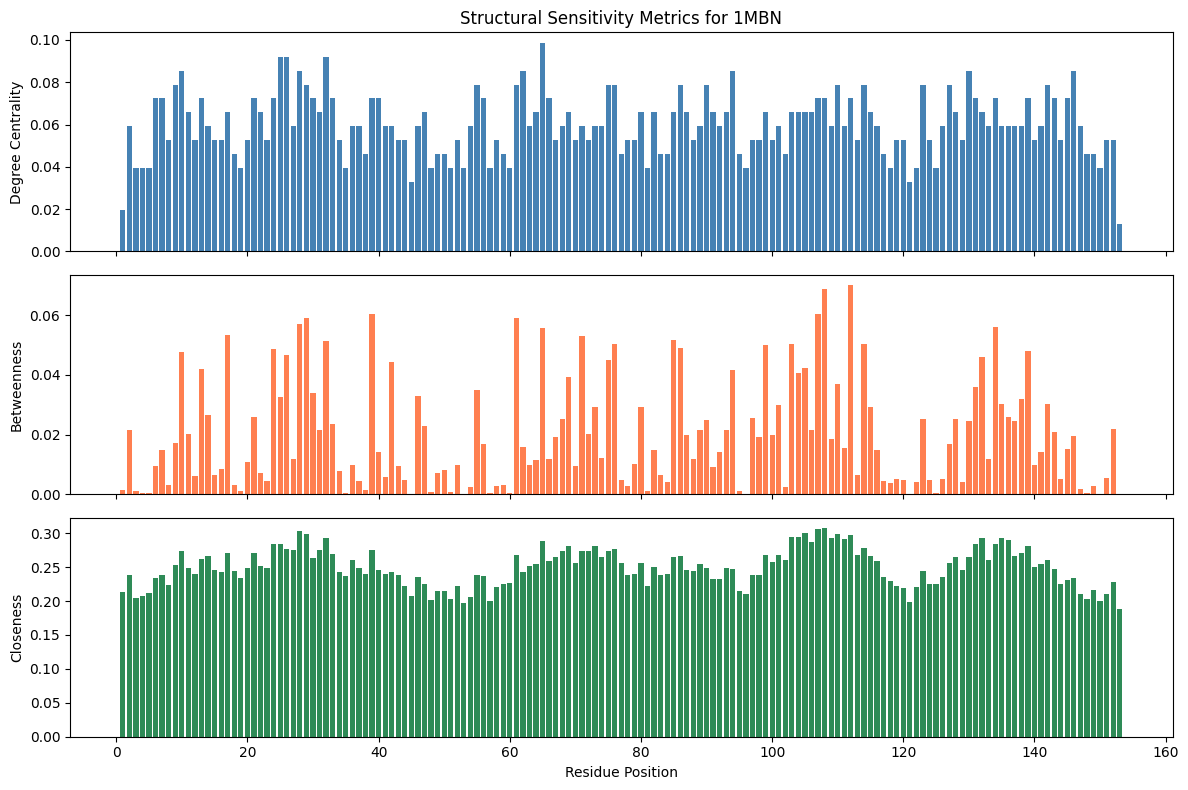

=== ANOVA: Centrality by Sequence Position (Quartiles) ===

Degree:
  F-statistic: 0.7570
  p-value: 0.5200
  Significant (p<0.05): False

Betweenness:
  F-statistic: 2.2515
  p-value: 0.0847
  Significant (p<0.05): False

Closeness:
  F-statistic: 4.4066
  p-value: 0.0053
  Significant (p<0.05): True

=== Group Means ===

                   degree  betweenness  closeness
position_quartile                                
N-term             0.0621       0.0206     0.2540
Mid-N              0.0587       0.0182     0.2422
Mid-C              0.0615       0.0261     0.2608
C-term             0.0578       0.0158     0.2429


C:\Users\justi\AppData\Local\Temp\ipykernel_4464\2642401484.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[metric].values for name, group in df.groupby('position_quartile')]
C:\Users\justi\AppData\Local\Temp\ipykernel_4464\2642401484.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('position_quartile')[['degree', 'betweenness', 'closeness']].mean().round(4))


In [13]:
from Bio.PDB import PDBParser, PDBList
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pdbl = PDBList()
pdbl.retrieve_pdb_file('1MBN', pdir='.', file_format='pdb')

parser = PDBParser(QUIET=True)
structure = parser.get_structure('1MBN', 'pdb1mbn.ent')

residues = []
atoms = []
for residue in structure.get_residues():
    if 'CA' in residue:
        residues.append((residue.get_resname(), residue.get_id()[1]))
        atoms.append(residue['CA'])

G = nx.Graph()
G.add_nodes_from(range(len(atoms)))

for i, atom1 in enumerate(atoms):
    for j, atom2 in enumerate(atoms[i+1:], i+1):
        if atom1 - atom2 < 8.0:
            G.add_edge(i, j)

degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

df = pd.DataFrame({
    'residue': [f"{res[0]}{res[1]}" for res in residues],
    'position': [res[1] for res in residues],
    'degree': [degree[i] for i in range(len(residues))],
    'betweenness': [betweenness[i] for i in range(len(residues))],
    'closeness': [closeness[i] for i in range(len(residues))]
})

print("Top 10 by Degree Centrality (most contacts):")
print(df.nlargest(10, 'degree')[['residue', 'degree']])

print("\nTop 10 by Betweenness (network hubs):")
print(df.nlargest(10, 'betweenness')[['residue', 'betweenness']])

print("\nTop 10 by Closeness (most central):")
print(df.nlargest(10, 'closeness')[['residue', 'closeness']])

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].bar(df['position'], df['degree'], color='steelblue')
axes[0].set_ylabel('Degree Centrality')
axes[0].set_title('Structural Sensitivity Metrics for 1MBN')

axes[1].bar(df['position'], df['betweenness'], color='coral')
axes[1].set_ylabel('Betweenness')

axes[2].bar(df['position'], df['closeness'], color='seagreen')
axes[2].set_ylabel('Closeness')
axes[2].set_xlabel('Residue Position')

plt.tight_layout()
plt.savefig('1mbn_centralities.png', dpi=150)
plt.show()

from scipy import stats
import pandas as pd

df['position_quartile'] = pd.qcut(df['position'], q=4, labels=['N-term', 'Mid-N', 'Mid-C', 'C-term'])

print("=== ANOVA: Centrality by Sequence Position (Quartiles) ===\n")

for metric in ['degree', 'betweenness', 'closeness']:
    groups = [group[metric].values for name, group in df.groupby('position_quartile')]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{metric.capitalize()}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant (p<0.05): {p_value < 0.05}\n")

print("=== Group Means ===\n")
print(df.groupby('position_quartile')[['degree', 'betweenness', 'closeness']].mean().round(4))

- Degree centrality identified GLY65 and GLY25 as having the most contacts. Glycines frequently occupy tightly packed positions where larger side chains cannot fit, and their high connectivity suggests that mutations introducing bulkier residues would cause steric clashes. The remaining top positions (LEU32, VAL10, ILE28) are hydrophobic residues that can typically be found near the protein core. Betweenness centrality highlighted ILE112, SER108, and THR39 as network hubs connecting different structural regions. These residues lie on many shortest paths through the contact network, suggesting they may be important for transmitting conformational changes or maintaining communication between helices. Mutations here could disrupt cooperative motions or allosteric behavior. Closeness centrality revealed a cluster of residues in the 103-112 region (SER108, ILE107, GLU105, ALA110, ILE112) as geometrically central to the fold. This region sits near the heme-binding pocket, and its centrality suggests mutations here would have widespread effects on overall protein stability. Notably, ILE28, GLY65, and residues in the 106-112 region appear across multiple metrics, indicating these positions are particularly critical to myoglobin's structural integrity and would likely be the most sensitive to mutation.

- We need to confirm position dependence by showing that centrality values are not uniformly distributed. In this case, we can segment the protein into quartiles from the N-terminus to the C-terminus and then use a one-way ANOVA to see if the centrality values differer significantly across these regions. A significant p-value (less that 0.05) indicates that structural sensitivity is position-dependent. This means that at least one region has systematically different centrality than the others. In this case, we can observe that both degree and betweeness fail to reach the p-value threshold - both are statistically insignificant. This suggests that local contact density and network hub behavior are distributed more evenly along the sequence, or that the quartile grouping doesn't capture the relevant structural distinctions. On the other hand, the closeness centrality shows significant position dependence. Looking at the group means, the Mid-C region (0.2608) and N-term (0.2540) have higher closeness than Mid-N (0.2422) and C-term (0.2429). This makes structural sense as the central portion of the protein fold tends to have residues from the middle of the sequence, where the helices pack against each other near the heme pocket.

- We can generate secondary structure assignments using pydssp, which classifies residues as helix (H), sheet (E), or coil (C) based on backbone geometry. We simplified these to two categories (Helix vs Coil) since myoglobin lacks β-sheet content. To test whether structural sensitivity differs by secondary structure, we performed one-way ANOVA comparing centrality values between helix and coil residues using SciPy's stats.f_oneway function. Helix residues were significantly more structurally constrained than coil residues across all measures. They have more contacts (degree), are more central to network communication (betweenness), and are geometrically closer to the rest of the structure (closeness). This makes structural sense as myoglobin is an all-alpha protein where the helices form the stable core and pack against each other and the heme. Coil regions are primarily short loops connecting helices and are more peripheral to the fold. Mutations in helical regions are predicted to be more disruptive to myoglobin stability than mutations in coils. This aligns with known mutagenesis data; core helix residues involved in heme binding and hydrophobic packing tend to be highly conserved and sensitive to substitution.


In [14]:
import pydssp
import torch
from Bio.PDB import PDBParser, PDBList
import networkx as nx
import pandas as pd
from scipy import stats

pdbl = PDBList()
pdbl.retrieve_pdb_file('1MBN', pdir='.', file_format='pdb')

parser = PDBParser(QUIET=True)
structure = parser.get_structure('1MBN', 'pdb1mbn.ent')

residues = []
atoms = []
for residue in structure.get_residues():
    if 'CA' in residue:
        residues.append((residue.get_resname(), residue.get_id()[1]))
        atoms.append(residue['CA'])

G = nx.Graph()
G.add_nodes_from(range(len(atoms)))
for i, atom1 in enumerate(atoms):
    for j, atom2 in enumerate(atoms[i+1:], i+1):
        if atom1 - atom2 < 8.0:
            G.add_edge(i, j)

degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

df = pd.DataFrame({
    'residue': [f"{res[0]}{res[1]}" for res in residues],
    'position': [res[1] for res in residues],
    'degree': [degree[i] for i in range(len(residues))],
    'betweenness': [betweenness[i] for i in range(len(residues))],
    'closeness': [closeness[i] for i in range(len(residues))]
})

coords = []
ss_positions = []
for residue in structure.get_residues():
    if 'N' in residue and 'CA' in residue and 'C' in residue and 'O' in residue:
        coords.append([
            list(residue['N'].get_coord()),
            list(residue['CA'].get_coord()),
            list(residue['C'].get_coord()),
            list(residue['O'].get_coord())
        ])
        ss_positions.append(residue.get_id()[1])

coord_tensor = torch.tensor([coords], dtype=torch.float32)
ss_codes = pydssp.assign(coord_tensor, out_type='c3')[0]

def simplify_ss(ss):
    if ss == 'H':
        return 'Helix'
    elif ss == 'E':
        return 'Sheet'
    else:
        return 'Coil'

dssp_df = pd.DataFrame({
    'position': ss_positions,
    'ss_raw': list(ss_codes),
    'secondary_structure': [simplify_ss(s) for s in ss_codes]
})

df = df.merge(dssp_df, on='position')

print("=== Secondary Structure Distribution ===")
print(df['secondary_structure'].value_counts())

print("\n=== ANOVA: Centrality by Secondary Structure ===\n")
for metric in ['degree', 'betweenness', 'closeness']:
    groups = [group[metric].values for name, group in df.groupby('secondary_structure', observed=True)]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{metric.capitalize()}: F={f_stat:.4f}, p={p_value:.4f}, Sig={p_value < 0.05}")

print("\n=== Group Means by Secondary Structure ===")
print(df.groupby('secondary_structure', observed=True)[['degree', 'betweenness', 'closeness']].mean().round(4))

df.to_csv('1mbn_network_metrics_annotated.csv', index=False)
print("\nAnnotated data saved to 1mbn_network_metrics_annotated.csv")

Structure exists: '.\pdb1mbn.ent' 
=== Secondary Structure Distribution ===
secondary_structure
Helix    118
Coil      35
Name: count, dtype: int64

=== ANOVA: Centrality by Secondary Structure ===

Degree: F=32.5562, p=0.0000, Sig=True
Betweenness: F=13.4963, p=0.0003, Sig=True
Closeness: F=32.1576, p=0.0000, Sig=True

=== Group Means by Secondary Structure ===
                     degree  betweenness  closeness
secondary_structure                                
Coil                 0.0487       0.0106     0.2290
Helix                0.0634       0.0230     0.2562

Annotated data saved to 1mbn_network_metrics_annotated.csv


Part 2: Defining Robust Positions

- In the context of our network analysis, robust positions are residues where mutations are predicted to have minimal impact on protein structure. These are the inverse of the structurally sensitive positions we identified earlier. We can define robust positions as those with low centrality values across our metrics:
    - Low degree centrality — Few contacts with neighboring residues, so mutations are less likely to cause steric clashes or disrupt local packing
    - Low betweenness centrality — Not critical for connecting different regions of the structure, so mutations won't disrupt long-range communication
    - Low closeness centrality — Peripheral to the overall fold, so mutations have limited propagation effects

    A practical approach is to create a composite robustness score by inverting and combining the normalized centrality metrics. 

- The top 10 most structurally robust positions are dominated by coil residues (7 of 10), consistent with our earlier finding that coil regions have lower centrality than helices. GLY153 at the C-terminus had the highest score (1.0), followed by VAL1 at the N-terminus. These are both terminal positions with inherently few structural constraints. Several glycines appear in this list (GLY153, GLY121, GLY150), which is notable because glycines are often considered structurally important due to their unique conformational flexibility. However, these particular glycines occupy peripheral loop positions rather than the tightly packed core positions where glycines are typically essential. The three helix residues that appear (ALA53, ARG45, ALA57) are located on helix surfaces facing solvent rather than participating in helix-helix packing interfaces. HIS48 is interesting as it sits in the distal pocket near the heme but in a loop region, suggesting it may be structurally tolerant even if functionally important for oxygen binding.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['degree_norm', 'betweenness_norm', 'closeness_norm']] = scaler.fit_transform(
    df[['degree', 'betweenness', 'closeness']]
)

df['sensitivity_score'] = (df['degree_norm'] + df['betweenness_norm'] + df['closeness_norm']) / 3
df['robustness_score'] = 1 - df['sensitivity_score']

print("=== Top 10 Most Robust Positions ===")
print(df.nlargest(10, 'robustness_score')[['residue', 'position', 'robustness_score', 'secondary_structure']])

=== Top 10 Most Robust Positions ===
    residue  position  robustness_score secondary_structure
152  GLY153       153          1.000000                Coil
0      VAL1         1          0.897888                Coil
120  GLY121       121          0.894348                Coil
52    ALA53        53          0.870948               Helix
44    ARG45        45          0.868969               Helix
149  GLY150       150          0.862071                Coil
56    ALA57        57          0.860235               Helix
47    HIS48        48          0.855689                Coil
50    THR51        51          0.851295                Coil
2      SER3         3          0.844003                Coil


- We can now use FireProtDB (https://loschmidt.chemi.muni.cz/fireprotdb/) to look for myoglobin (ID: P02185) ΔΔG values and export the results as a CSV file. However, running a script to parse the extensive myoglobin file for sperm whale myoglobin returned no ΔΔG values and thus we are unable to perform this specific comparison between ΔΔG and our generated robustness scores. At the same time, this lack of measurements also makes it impossible to quantify a "small functional change" from experimental data; there is no way to apply standard literature thresholds wherein a ΔΔG change of less than 1 kcal/mol might be considered a neutral/small change etc. (Frenz, 2020).

In [16]:
import pandas as pd
import re

fpdb = pd.read_csv(r"C:\Users\justi\Documents\Python Files\fireprotdb_20251015-164116.csv", low_memory=False)

myo = fpdb[(fpdb['PROTEIN'].str.contains('yoglobin', case=False, na=False)) & 
           (fpdb['ORGANISM'] == 'Physeter macrocephalus')]

print(f"Sperm whale myoglobin entries: {len(myo)}")

myo_ddg = myo[myo['DDG'].notna()][['SUBSTITUTION', 'DDG']].copy()
print(f"Entries with DDG values: {len(myo_ddg)}")

def extract_position(sub):
    if pd.isna(sub):
        return None
    match = re.search(r'[A-Z](\d+)[A-Z]', sub)
    return int(match.group(1)) if match else None

myo_ddg['position'] = myo_ddg['SUBSTITUTION'].apply(extract_position)
myo_ddg = myo_ddg.dropna(subset=['position'])
myo_ddg['position'] = myo_ddg['position'].astype(int)

print(f"\nEntries with valid positions: {len(myo_ddg)}")
print(f"Unique positions covered: {myo_ddg['position'].nunique()}")
print(f"\nSample data:")
print(myo_ddg.head(10))

myo_ddg.to_csv('myoglobin_ddg.csv', index=False)
print("\nSaved to myoglobin_ddg.csv")

Sperm whale myoglobin entries: 22
Entries with DDG values: 0

Entries with valid positions: 0
Unique positions covered: 0

Sample data:
Empty DataFrame
Columns: [SUBSTITUTION, DDG, position]
Index: []

Saved to myoglobin_ddg.csv


Part 3: Correlation Between Structural Changes and Functional Changes

- The work we did in part 1 performing a network analysis on 1MBN helps to act as a proxy for predicting structural change; this takes the form of centrality scores. Positions with high centrality are predicted to cause larger structural perturbations when mutated because they have more contacts, sit on more communication pathways, or are geometrically central to the fold. This means that we can take our generated scores and validate them with functional changes that have been experimentally identified. 

- Experimental functional data for sperm whale myoglobin mutations is available from work done by Hargrove et al. in 1994, who measured stability paramteres for 22 mutatns at 5 positioins in the heme pocket: 29(B10), 43(CD1), 64(E7), 68(E11), and 107(G8). This functional change was quantified using guanidinium chloride (GdmCl)-induced unfolding that was monitored by tryptophan fluorescence to measure two equilibrium constants describing a two-step unfolding pathway. The constants were K(N,I): native apoprotein (N) -> molten globlue intermediate (I) and K(I,U): intermediate (I) -> unfolded state (U). The overall stability was calculated as 1/(K(N,I) × K(I,U)), with higher values indicate greater resistance to unfolding. Polar substitutions in the heme pocket (L29N, V68N) massively destabilized the apoprotein, with V68N and L29N apomyoglobins existing in the molten globule state even without denaturant. On the other hand, hydrophobic substitutions at the distal histidine position (H64L, H64F) increased stability 20–35-fold relative to wild-type. This demonstrates that functional residues like His64 that are required for oxygen affinity and resistance to auto-oxidation are maintained even at the cost of protein stability.

- Going back to our centrality-based sensitivity scores, we can classify positions by percentile or fold-difference from the median. Small structural sensitivity would belong to the bottom quartile of sensitivity scores, demonstrating high robustness; large structural sensitivity would include the top quartile of sensitivity scores with low robustness. This process can be repeated with the stability values generated by Hargrove to classify the mutuations into different functional change groups (small functional change -> stability within 5-fold of wild-type...). Our results show that there are only weak correlatiosn that are not statistically significant. This can be expected as there are only 5 overlapping data points that we could compare between the data sets. However, there are still some observations that can be interpreted. Position 29 (Leu) stands out as it has the highest degree centrality of 0.079, high betweenness of 0.059, high closeness of 0.299, AND the largest functional effect (4,500-fold change for L29N); this aligns with our hypothesis. On the other hand, position 107 (Ile) is interesting; it has the second-highest betweenness of 0.061 and highest closeness of 0.306, yet shows the smallest functional change (15.5-fold). This suggests that network centrality alone doesn't fully predict mutational sensitivity—the type of mutation matters. The Hargrove data shows polar substitutions (L29N, V68N) cause much larger effects than conservative hydrophobic changes. This suggests that network analysis predicts where mutations may be disruptive, but not which mutations will be most damaging.


=== Centrality Values for Hargrove Positions ===

   position residue    degree  betweenness  closeness  max_fold_change
0        29   LEU29  0.078947     0.059085   0.298625      4500.000000
1        43   PHE43  0.052632     0.009528   0.238245        32.142857
2        64   HIS64  0.065789     0.011345   0.255034        35.555556
3        68   VAL68  0.059211     0.025331   0.273381       225.000000
4       107  ILE107  0.072368     0.060512   0.306452        15.517241

=== Correlation: Sensitivity Score vs Max Fold Change ===

Spearman: r=0.400, p=0.5046
Pearson: r=0.600, p=0.2843

=== Correlation: Individual Centrality Metrics vs Max Fold Change ===

Degree: r=0.300, p=0.6238
Betweenness: r=0.000, p=1.0000
Closeness: r=0.000, p=1.0000


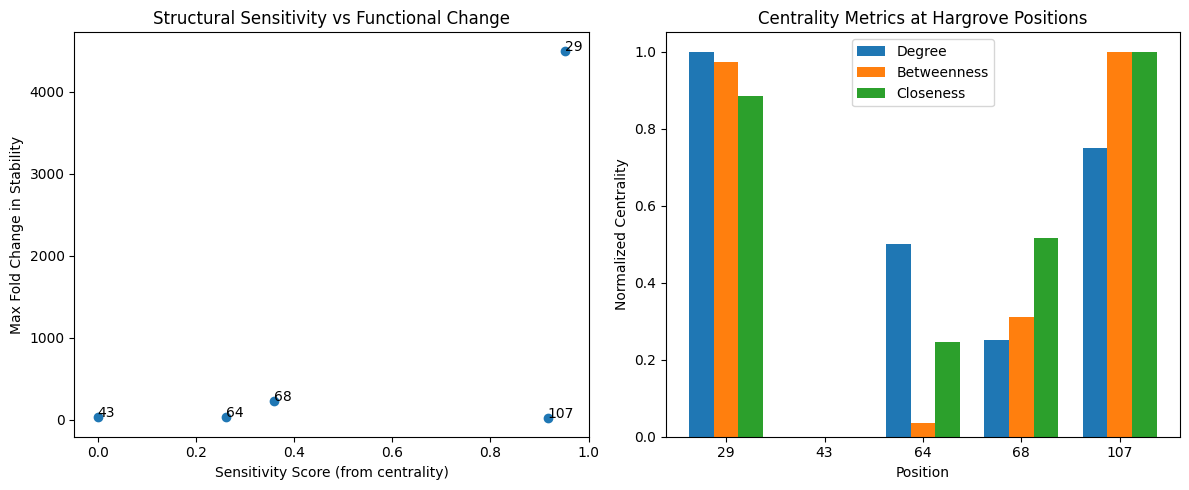


=== Summary Table ===

 position residue  sensitivity_score  max_fold_change most_destabilizing_mut most_stabilizing_mut
       29   LEU29           0.952416      4500.000000                   L29N                 L29F
       43   PHE43           0.000000        32.142857                   F43V                 F43I
       64   HIS64           0.260594        35.555556                   H64Q                 H64F
       68   VAL68           0.358368       225.000000                   V68N                 V68F
      107  ILE107           0.916667        15.517241                  I107T                I107F


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

df = pd.read_csv('1mbn_network_metrics_annotated.csv')

hargrove_data = pd.DataFrame({
    'position': [29, 43, 64, 68, 107],
    'wt_residue': ['Leu', 'Phe', 'His', 'Val', 'Ile'],
    'wt_stability': [45000, 45000, 45000, 45000, 45000],
    'most_destabilizing_mut': ['L29N', 'F43V', 'H64Q', 'V68N', 'I107T'],
    'destab_stability': [10, 1400, 50000, 200, 2900],
    'most_stabilizing_mut': ['L29F', 'F43I', 'H64F', 'V68F', 'I107F'],
    'stab_stability': [100000, 28000, 1600000, 500000, 330000]
})

hargrove_data['destab_fold_change'] = hargrove_data['wt_stability'] / hargrove_data['destab_stability']
hargrove_data['stab_fold_change'] = hargrove_data['stab_stability'] / hargrove_data['wt_stability']
hargrove_data['max_fold_change'] = hargrove_data[['destab_fold_change', 'stab_fold_change']].max(axis=1)

merged = df.merge(hargrove_data, on='position')

print("=== Centrality Values for Hargrove Positions ===\n")
print(merged[['position', 'residue', 'degree', 'betweenness', 'closeness', 'max_fold_change']])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged[['degree_norm', 'betweenness_norm', 'closeness_norm']] = scaler.fit_transform(
    merged[['degree', 'betweenness', 'closeness']]
)
merged['sensitivity_score'] = (merged['degree_norm'] + merged['betweenness_norm'] + merged['closeness_norm']) / 3

print("\n=== Correlation: Sensitivity Score vs Max Fold Change ===\n")
r_spearman, p_spearman = spearmanr(merged['sensitivity_score'], merged['max_fold_change'])
r_pearson, p_pearson = pearsonr(merged['sensitivity_score'], merged['max_fold_change'])
print(f"Spearman: r={r_spearman:.3f}, p={p_spearman:.4f}")
print(f"Pearson: r={r_pearson:.3f}, p={p_pearson:.4f}")

print("\n=== Correlation: Individual Centrality Metrics vs Max Fold Change ===\n")
for metric in ['degree', 'betweenness', 'closeness']:
    r, p = spearmanr(merged[metric], merged['max_fold_change'])
    print(f"{metric.capitalize()}: r={r:.3f}, p={p:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(merged['sensitivity_score'], merged['max_fold_change'])
for i, row in merged.iterrows():
    axes[0].annotate(f"{row['position']}", (row['sensitivity_score'], row['max_fold_change']))
axes[0].set_xlabel('Sensitivity Score (from centrality)')
axes[0].set_ylabel('Max Fold Change in Stability')
axes[0].set_title('Structural Sensitivity vs Functional Change')

metrics = ['degree', 'betweenness', 'closeness']
x_pos = np.arange(len(merged))
width = 0.25
for i, metric in enumerate(metrics):
    vals = (merged[metric] - merged[metric].min()) / (merged[metric].max() - merged[metric].min())
    axes[1].bar(x_pos + i*width, vals, width, label=metric.capitalize())
axes[1].set_xticks(x_pos + width)
axes[1].set_xticklabels(merged['position'])
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Normalized Centrality')
axes[1].set_title('Centrality Metrics at Hargrove Positions')
axes[1].legend()

plt.tight_layout()
plt.savefig('hargrove_correlation.png', dpi=150)
plt.show()

print("\n=== Summary Table ===\n")
summary = merged[['position', 'residue', 'sensitivity_score', 'max_fold_change', 'most_destabilizing_mut', 'most_stabilizing_mut']]
print(summary.to_string(index=False))

Part 4: Results
- We constructed a residue interaction network for sperm whale myoglobin (PDB: 1MBN) to assess position-dependent structural sensitivity using degree, betweenness, and closeness centrality metrics. ANOVA revealed that centrality values differ significantly by secondary structure (p < 0.001 for all metrics), with helix residues showing higher centrality than coil residues. This indicated that helical positions are more structurally constrained and predicted to be more sensitive to mutation. Robust positions, defined by low centrality scores, were predominantly located in coil regions and at the N- and C-termini (e.g., Gly153, Val1, Gly121), consistent with the expectation that peripheral residues tolerate substitutions more readily. To validate these structural predictions, we compared centrality scores at five positions (29, 43, 64, 68, 107) with experimental stability data from Hargrove et al. (1994), who quantified functional change as fold-change in overall apoprotein stability upon mutation. Position 29, which had the highest centrality metrics, also showed the largest destabilization upon polar mutation (4,500-fold for L29N), supporting the hypothesis that structurally central positions exhibit larger functional changes when mutated. However, the overall correlation was weak (Spearman r = 0.40, p = 0.50), reflecting both the limited sample size and the confounding effect of mutation type—polar substitutions caused consistently larger effects than hydrophobic ones regardless of network centrality. This suggests that network analysis can identify positions likely to be mutation-sensitive, but the magnitude of functional change also depends on the specific nature of the substitution.

Were my questions answered by my analysis

- The network analysis successfully demonstrated that structural sensitivity is position-dependent in myoglobin. Centrality metrics identified helix residues as significantly more structurally constrained than coil residues (ANOVA p < 0.001), and robust positions clustered at the termini and loop regions as expected. This confirms that network analysis can serve as a computational proxy for predicting which positions are likely to be mutation-sensitive.

- Validating these predictions against experimental data was limited by data availability. Although FireProtDB aggregates ΔΔG values from sources like ProTherm, sperm whale myoglobin had minimal coverage, requiring reliance on the Hargrove et al. (1994) dataset with only five positions. The correlation between centrality and functional change was positive but not significant (r = 0.40, p = 0.50), partly due to small sample size and the confounding effect of mutation type—polar substitutions caused larger effects than hydrophobic ones regardless of position. 

References:

Frenz, B., Lewis, S. M., King, I., DiMaio, F., Park, H., & Song, Y. (2020). Prediction of protein mutational free energy: Benchmark and sampling improvements increase classification accuracy. Frontiers in Bioengineering and Biotechnology, 8, 558247. https://doi.org/10.3389/fbioe.2020.558247

Hargrove, M. S., Krzywda, S., Wilkinson, A. J., Dou, Y., Ikeda-Saito, M., & Olson, J. S. (1994). Stability of myoglobin: A model for the folding of heme proteins. Biochemistry, 33(39), 11767–11775. https://doi.org/10.1021/bi00205a012